### Estimates of Locations

In [2]:
# Mean of total medals won by countries

import pandas as pd

medal_count = pd.read_excel("../data/Medals.xlsx")
print(medal_count)

medal_count['Total'].mean()

    Rank                    Team/NOC  Gold  Silver  Bronze  Total  \
0      1    United States of America    39      41      33    113   
1      2  People's Republic of China    38      32      18     88   
2      3                       Japan    27      14      17     58   
3      4               Great Britain    22      21      22     65   
4      5                         ROC    20      28      23     71   
..   ...                         ...   ...     ...     ...    ...   
88    86                       Ghana     0       0       1      1   
89    86                     Grenada     0       0       1      1   
90    86                      Kuwait     0       0       1      1   
91    86         Republic of Moldova     0       0       1      1   
92    86        Syrian Arab Republic     0       0       1      1   

    Rank by Total  
0               1  
1               2  
2               5  
3               4  
4               3  
..            ...  
88             77  
89         

c:\Users\Driptanil\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


11.612903225806452

In [7]:
# Weighted mean

import numpy as np

np.average(medal_count['Total'], weights=medal_count['Gold'])

46.832352941176474

In [8]:
# Trimmed Mean

from scipy.stats import trim_mean

trim_mean(medal_count['Gold'], 0.1)

1.96

In [9]:
# Median

medal_count["Total"].median()

4.0

In [10]:
# Weighted Median

def weighted_mean(df, median_col, weighted_col) :
    df_sorted = df.sort_values(median_col)
    cumsum = df_sorted[weighted_col].cumsum()
    cutoff = df_sorted[weighted_col].sum() / 2
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]


weighted_mean(medal_count, 'Total', 'Gold')

40

In [11]:
# Percentile

import numpy as np

np.percentile(medal_count['Total'], 75)

11.0

In [12]:
# Variance 

from statistics import variance

variance(medal_count['Gold'])

49.315100514259

In [13]:
# Standard Deviation

from statistics import stdev

stdev(medal_count['Gold'])

7.022471111671376

In [14]:
# Mean Absolute Deviation

from numpy import mean, absolute

mean(absolute(medal_count['Gold'] - mean(medal_count['Gold'])))

4.0048560527228485

<AxesSubplot:>

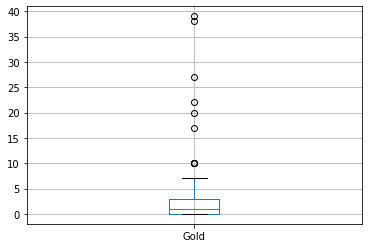

In [15]:
# Box plot

medal_count.boxplot(column='Gold')

In [16]:
# Frequency Table

frequency_table = medal_count.copy()
frequency_table['freq'] = pd.cut(medal_count['Gold'], 10)
frequency_table.groupby('freq')['Rank'].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


(array([50., 11., 11.,  5.,  2.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ,
        14.3, 15.6, 16.9, 18.2, 19.5, 20.8, 22.1, 23.4, 24.7, 26. , 27.3,
        28.6, 29.9, 31.2, 32.5, 33.8, 35.1, 36.4, 37.7, 39. ]),
 <BarContainer object of 30 artists>)

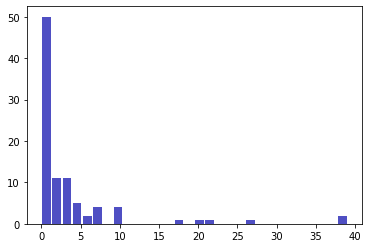

In [17]:
# Histogram
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
plt.hist(x=medal_count['Gold'], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

<AxesSubplot:ylabel='Density'>

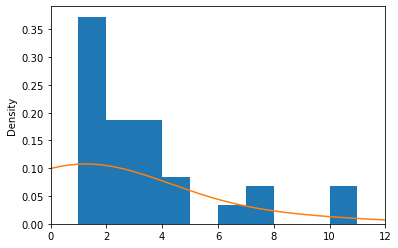

In [35]:
# Histogram
import matplotlib.pyplot as plt

ax = medal_count['Gold'].plot.hist(density=True, xlim=[0, 12], bins=range(1, 12))

medal_count['Gold'].plot.density(ax=ax)

In [36]:
# Mode

medal_count["Gold"].mode()

0    0
Name: Gold, dtype: int64

Text(0, 0.5, 'Country')

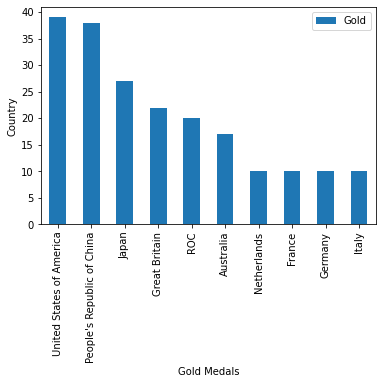

In [38]:
# Bar Chart

ax = medal_count.iloc[: 10].plot.bar(x='Team/NOC', y='Gold')
ax.set_xlabel("Gold Medals")
ax.set_ylabel("Country")

([<matplotlib.patches.Wedge at 0x2a882fe3d30>,
 [Text(0.9056540287594277, 0.6243322674600584, 'United States of America'),
  Text(-0.2447730130080498, 1.0724207066739067, "People's Republic of China"),
  Text(-1.0368582567432332, 0.36732132448767996, 'Japan'),
  Text(-1.0053611027194034, -0.4463732217985588, 'Great Britain'),
  Text(-0.530227440553304, -0.9637732416311904, 'ROC'),
  Text(0.07654333332162216, -1.0973336402954277, 'Australia'),
  Text(0.5152491863253977, -0.9718633010825214, 'Netherlands'),
  Text(0.7867928028369275, -0.7687373318657108, 'France'),
  Text(0.983561130149625, -0.4925520310168184, 'Germany'),
  Text(1.0868536812649736, -0.16955552341571054, 'Italy')],
 [Text(0.4939931065960514, 0.34054487316003185, '19.2%'),
  Text(-0.13351255254984531, 0.5849567490948581, '18.7%'),
  Text(-0.5655590491326726, 0.20035708608418903, '13.3%'),
  Text(-0.5483787833014927, -0.24347630279921387, '10.8%'),
  Text(-0.28921496757452936, -0.5256944954351946, '9.9%'),
  Text(0.0417509

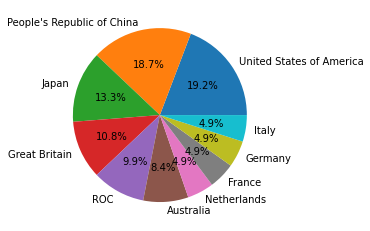

In [41]:
# Pie Chart

pie_data = medal_count.iloc[: 10]

plt.pie(pie_data['Gold'],labels=pie_data['Team/NOC'], autopct='%1.1f%%')

In [42]:
# Correlation

medal_count.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

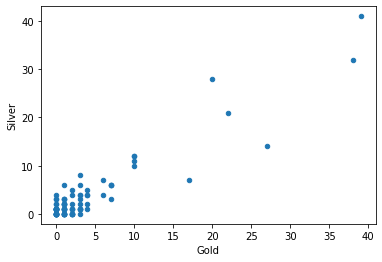

In [43]:
# Scatter Plot

medal_count.plot.scatter(x='Gold', y='Silver')

<AxesSubplot:xlabel='Gold', ylabel='Silver'>

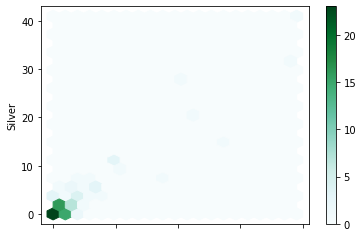

In [54]:
# Hexagonal Binning

medal_count.plot.hexbin(x='Gold', y='Silver', gridsize=20)

c:\Users\Driptanil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gold', ylabel='Silver'>

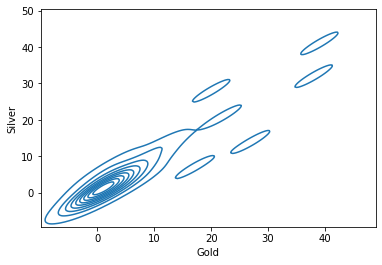

In [55]:
# Contour Plot

import seaborn as sns

sns.kdeplot(medal_count['Gold'], medal_count['Silver'])

<AxesSubplot:>

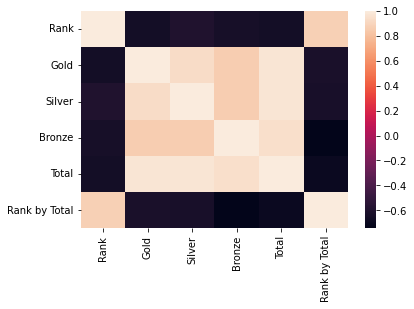

In [2]:
# Heatmap

import seaborn as sns

sns.heatmap(medal_count.corr())

In [5]:
# Contingency Table

crosstab = medal_count.pivot_table(index='Team/NOC', columns='Gold')
crosstab.fillna(0)

Bronze                                            \
Gold                         0     1    2    3    4    6    7    10    17   
Team/NOC                                                                    
Argentina                   2.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
Armenia                     2.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
Australia                   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  22.0   
Austria                     0.0   5.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
Azerbaijan                  4.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
...                         ...   ...  ...  ...  ...  ...  ...  ...   ...   
Uganda                      0.0   0.0  1.0  0.0  0.0  0.0  0.0  0.0   0.0   
Ukraine                     0.0  12.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
United States of America    0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   
Uzbekistan                  0.0   0.0  0.0  2.0  0.0  0.0  0.0  0.0   0.0   
Venezuela                   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   

                               ... Total                                      \
Gold                       20  ...    4    6    7    10    17   20   22   27   
Team/NOC                       ...                                             
Argentina                 0.0  ...   0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
Armenia                   0.0  ...   0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
Australia                 0.0  ...   0.0  0.0  0.0  0.0  46.0  0.0  0.0  0.0   
Austria                   0.0  ...   0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
Azerbaijan                0.0  ...   0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
...                       ...  ...   ...  ...  ...  ...   ...  ...  ...  ...   
Uganda                    0.0  ...   0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
Ukraine                   0.0  ...   0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
United States of America  0.0  ...   0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
Uzbekistan                0.0  ...   0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   
Venezuela                 0.0  ...   0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   

                                      
Gold                       38     39  
Team/NOC                              
Argentina                 0.0    0.0  
Armenia                   0.0    0.0  
Australia                 0.0    0.0  
Austria                   0.0    0.0  
Azerbaijan                0.0    0.0  
...                       ...    ...  
Uganda                    0.0    0.0  
Ukraine                   0.0    0.0  
United States of America  0.0  113.0  
Uzbekistan                0.0    0.0  
Venezuela                 0.0    0.0  

[93 rows x 70 columns]

In [12]:
medal_count[['Silver', 'Gold']].pivot_table(index='Silver', columns='Gold', aggfunc=lambda x: len(x))

Gold,0,1,2,3,4,6,7,10,17,20,22,27,38,39
Silver,,,,,,,,,,,,,,
0,11.0,7.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.0,6.0,3.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,5.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,3.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1.0,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


c:\Users\Driptanil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gold'>

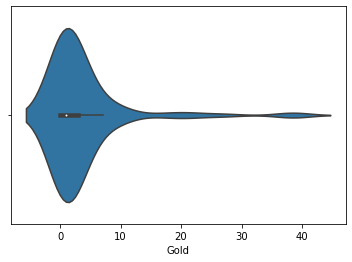

In [13]:
import seaborn as sns

sns.violinplot(medal_count['Gold'])